In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
df = pd.read_excel('anova_lab_data.xlsx')

# State the null hypothesis
The null hypothesis for our test is that different levels of Power of the plasma beam don't have any effect on the etching rate of the microchip. Therefore, the etching rate mean of each level of power is not significantly different.

# State the alternative hypothesis
The alternative hypothesis for our test is that different levels of Power of the plasma beam do have an effect on the etching rate of the microchip. Therefore, the etching rate mean of each level of power is significantly different.

# Significance level: 0.95

# Conducting ANOVA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Power         15 non-null     object 
 1   Etching Rate  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


In [13]:
# We need to change both column names so there are no blank spaces
df.rename(columns={'Etching Rate': 'etching_rate', 'Power ': 'power'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   power         15 non-null     object 
 1   etching_rate  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


In [16]:
df.describe()

,etching_rate
count,15.000000
mean,6.782667
std,1.228643
min,5.430000
25%,5.845000
50%,6.240000
75%,7.725000
max,9.200000


In [14]:
model = ols('etching_rate ~ C(power)', data=df).fit()

In [15]:
results_table = sm.stats.anova_lm(model)
results_table

,df,sum_sq,mean_sq,F,PR(>F)
C(power),2.0,18.176653,9.088327,36.878955,0.000008
Residual,12.0,2.957240,0.246437,NaN,NaN


# What are the degrees of freedom of model, error terms, and total DoF
The model has 2 degrees of freedom (number of categories, k, minus 1). The total error terms of the model are a sum of errors of 21.12 and a mean error of 9.32. The total degrees of freedom of the model is 14: DoF of the model (k - 1) + DoF of the residuals (n - k).

# What conclusions can you draw from the experiment and why?

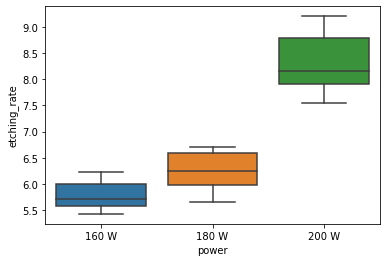

In [19]:
import seaborn as sns
sns.boxplot(x='power', y='etching_rate', data=df);

Having a p-value < 0.05 derived from the F test, we can safely reject the null hypothesis and conclude that there are, indeed, differences in etching rate for each power level. Furthermore, as seen in the boxplot above, it seems that the higher the power level, the more etching the microprocessor chip presents.